In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('consolidated_output.xlsx')

print(df.head())
print(df.info())
print(df['class'].value_counts())

                      Filename  Status Code  \
0  Copy of 20231012_160406.jpg          200   
1  Copy of 20231012_160542.jpg          200   
2  Copy of 20231012_160603.jpg          200   
3  Copy of 20231012_161056.jpg          200   
4  Copy of 20231012_161348.jpg          200   

                                       Response Text  \
0  {"location":{"city":{"geoname_id":1690039,"nam...   
1  {"location":{"city":{"geoname_id":1690039,"nam...   
2  {"location":{"city":{"geoname_id":1690039,"nam...   
3  {"location":{"city":{"geoname_id":1690039,"nam...   
4  {"location":{"city":{"geoname_id":1690039,"nam...   

                                           text_data   class  
0  CVZH ЛООСИЕК\n1917812-1850 *10/910-1213 0023\n...  Assets  
1  1735 CORP.\nExchange Corner Building 107 V.A. ...  Assets  
2  1 735 CORP.\nExchange Corner Building 107 V.A....  Assets  
3  185 sq.m\n214 sq.m and timber materials.) with...  Assets  
4  NOTE: Write the number and date of this receip...  Assets  
<c

In [3]:
#Preprocessing of text_data

# Example preprocessing function
def preprocess_text(text):
    # Replace or remove other specific characters if needed
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalnum()]  # Remove non-alphanumeric characters
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]  # Stemming
    return ' '.join(tokens)

# Apply the preprocessing function to the 'text_data' column
df['text_data'] = df['text_data'].replace('\n', ' ', regex=True)
df['text_data'] = df['text_data'].apply(preprocess_text)

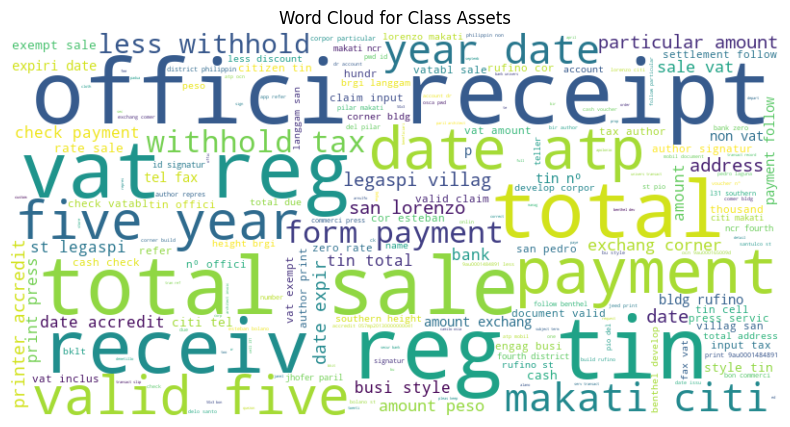

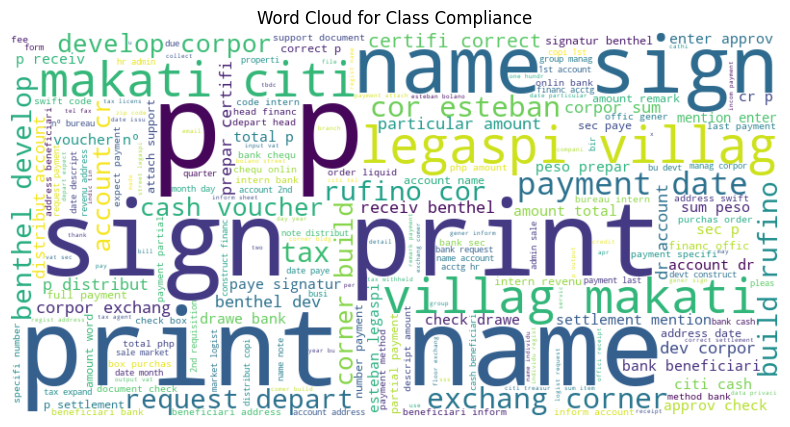

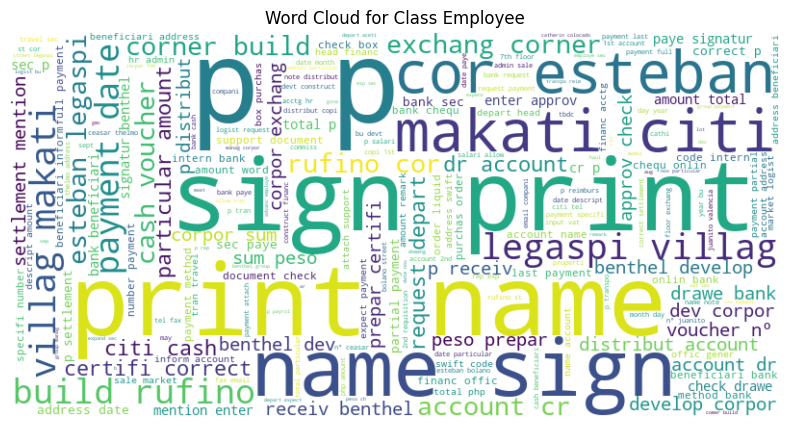

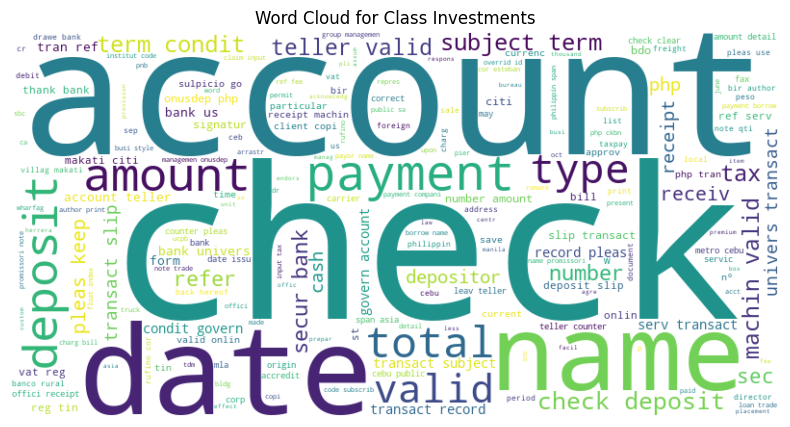

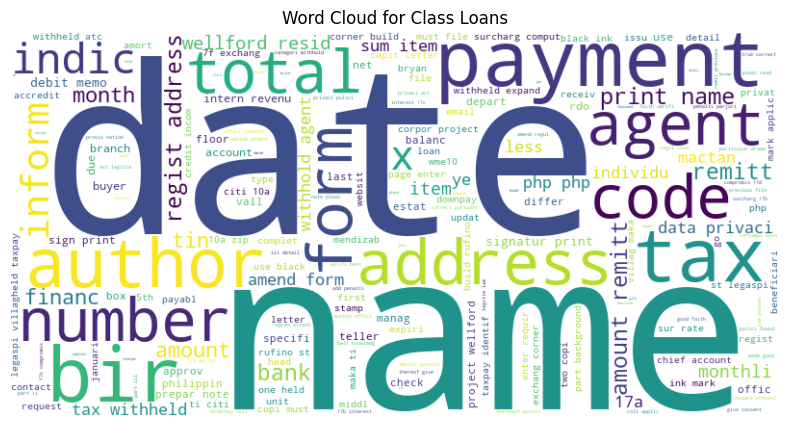

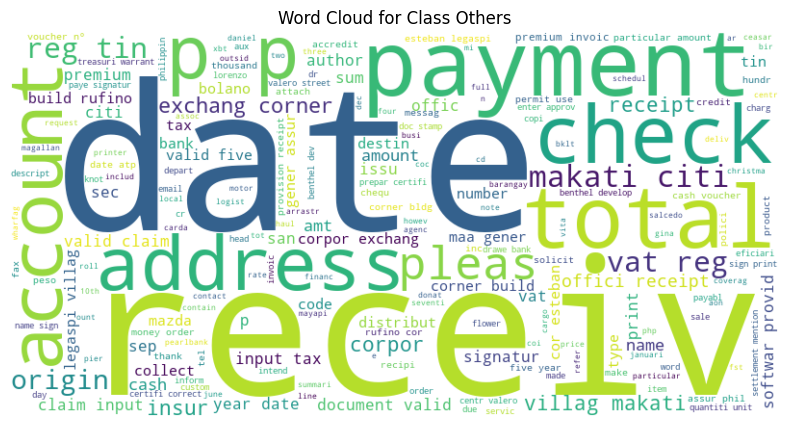

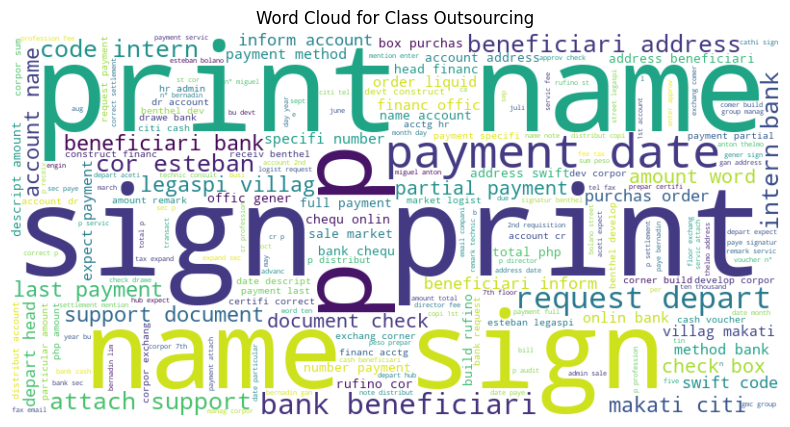

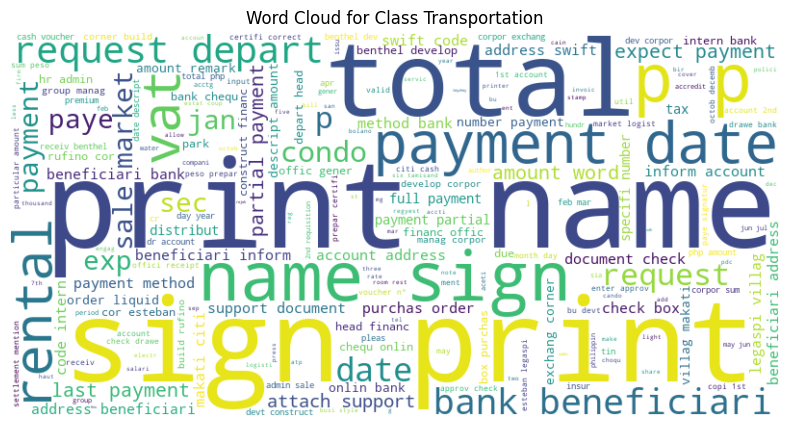

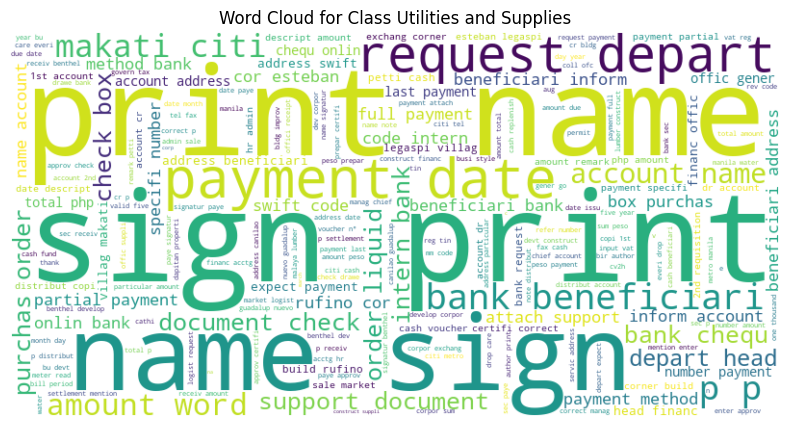

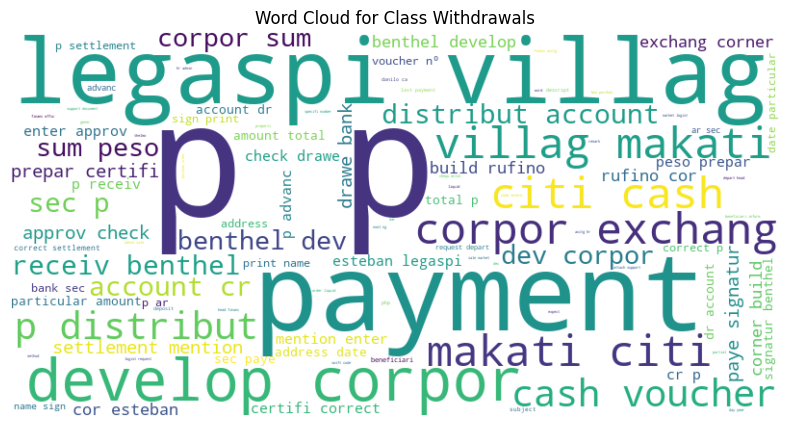

In [4]:
classes = df['class'].unique()

# Create a WordCloud for each class
for class_label in classes:
    # Filter data for the current class
    class_data = df[df['class'] == class_label]['text_data']
    
    # Concatenate text data for the class into a single string
    text_for_class = ' '.join(class_data)
    
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_class)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class {class_label}')
    plt.show()

In [5]:
# Assuming 'df' is your DataFrame

X = df['text_data']
y = df['class']

In [6]:
# Convert class labels to numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Create and train the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.41578947368421054
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       1.00      0.06      0.11        34
           2       0.45      0.60      0.52        50
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.37      0.87      0.52        31
           7       0.00      0.00      0.00         1
           8       0.37      0.45      0.40        38
           9       0.00      0.00      0.00         7

    accuracy                           0.42       190
   macro avg       0.32      0.24      0.22       190
weighted avg       0.47      0.42      0.34       190



c:\Users\JLCarunungan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JLCarunungan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JLCarunungan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

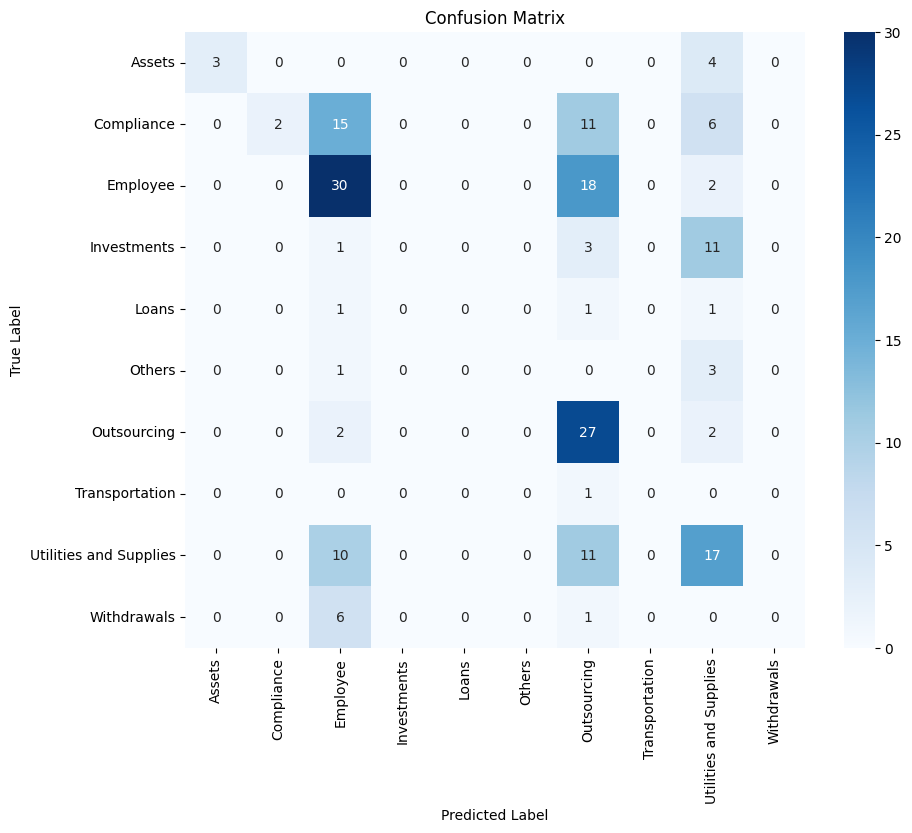

In [9]:
# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
# Example of hyperparameter tuning
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0]
for alpha in alphas:
    model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=alpha))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Alpha: {alpha}, Accuracy: {accuracy_score(y_test, y_pred)}")

Alpha: 0.1, Accuracy: 0.6052631578947368
Alpha: 0.2, Accuracy: 0.5473684210526316
Alpha: 0.3, Accuracy: 0.5105263157894737
Alpha: 0.4, Accuracy: 0.48947368421052634
Alpha: 0.5, Accuracy: 0.4631578947368421
Alpha: 0.6, Accuracy: 0.4473684210526316
Alpha: 0.7, Accuracy: 0.4368421052631579
Alpha: 0.8, Accuracy: 0.4368421052631579
Alpha: 0.9, Accuracy: 0.43157894736842106
Alpha: 1.0, Accuracy: 0.41578947368421054
Alpha: 10.0, Accuracy: 0.3526315789473684
